In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Heirarchy --- seasonality when sku level signal weak

In [13]:
df_raw = pd.read_excel("Hackathon Data.xlsx")

In [15]:
df_raw["Encoded_SKU_ID"].nunique()

575

In [16]:
df_raw.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,?,?,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,?,498,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,7


In [18]:
df_raw["Inventory"].unique()

array(['Fully-Stocked', 'Constrained', 'Moderate', 'Out-of-Stock'],
      dtype=object)

In [19]:
df_raw['Encoded_SKU_ID'].isna().sum()

0

In [93]:
df_subset=df_raw[['Encoded_SKU_ID','SALES_DATE','Inventory','DAILY_UNITS']]

In [94]:
df_subset['Inventory'].isna().sum()

0

In [95]:
df_subset['DAILY_UNITS'].isna().sum()

0

In [96]:
df_subset['Inventory'].value_counts()

Fully-Stocked    692604
Moderate          54825
Constrained       52711
Out-of-Stock      46492
Name: Inventory, dtype: int64

In [97]:
df_subset["sales_yr"]=df_subset["SALES_DATE"].dt.year
df_subset["sales_quarter"]=df_subset["SALES_DATE"].dt.quarter

/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/4032244470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["sales_yr"]=df_subset["SALES_DATE"].dt.year
/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/4032244470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["sales_quarter"]=df_subset["SALES_DATE"].dt.quarter


In [98]:
def quarter(row):
    return 'Q'+ str(row.sales_quarter)+'_'+str(row.sales_yr)

In [99]:
df_subset.loc[:,'quarter']=df_subset.apply(lambda x:quarter(x), axis=1)

/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/645980920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[:,'quarter']=df_subset.apply(lambda x:quarter(x), axis=1)


In [35]:
df_subset.head()

,Encoded_SKU_ID,SALES_DATE,Inventory,DAILY_UNITS,sales_yr,sales_quarter,quarter
0,1,2017-09-28,Fully-Stocked,1,2017,3,Q3_2017
1,2,2017-11-24,Fully-Stocked,18,2017,4,Q4_2017
2,3,2019-11-28,Constrained,7,2019,4,Q4_2019
3,4,2021-04-21,Fully-Stocked,6,2021,2,Q2_2021
4,1,2018-10-27,Fully-Stocked,7,2018,4,Q4_2018


In [36]:
df_subset.columns

Index(['Encoded_SKU_ID', 'SALES_DATE', 'Inventory', 'DAILY_UNITS', 'sales_yr',
       'sales_quarter', 'quarter'],
      dtype='object')

In [100]:
df_g1=df_subset.groupby(["Encoded_SKU_ID","quarter"],as_index=False).\
agg(avg_quarterly_units_sold=('DAILY_UNITS','mean'),std_quarterly_units_sold=('DAILY_UNITS',lambda x: x.std(ddof=0)))

In [102]:
df_g1.columns

Index(['Encoded_SKU_ID', 'quarter', 'avg_quarterly_units_sold',
       'std_quarterly_units_sold'],
      dtype='object')

In [103]:
df_m1=df_subset.merge(df_g1,on=['Encoded_SKU_ID','quarter'],how="inner")

In [104]:
df_m1

,Encoded_SKU_ID,SALES_DATE,Inventory,DAILY_UNITS,sales_yr,sales_quarter,quarter,avg_quarterly_units_sold,std_quarterly_units_sold
0,1,2017-09-28,Fully-Stocked,1,2017,3,Q3_2017,2.695652,1.64673
1,1,2017-08-27,Fully-Stocked,2,2017,3,Q3_2017,2.695652,1.64673
2,1,2017-07-21,Fully-Stocked,6,2017,3,Q3_2017,2.695652,1.64673
3,1,2017-07-14,Out-of-Stock,6,2017,3,Q3_2017,2.695652,1.64673
4,1,2017-07-05,Out-of-Stock,2,2017,3,Q3_2017,2.695652,1.64673
...,...,...,...,...,...,...,...,...,...
846627,163,2019-09-29,Out-of-Stock,0,2019,3,Q3_2019,0.000000,0.00000
846628,563,2019-03-31,Out-of-Stock,0,2019,1,Q1_2019,0.000000,0.00000
846629,157,2017-12-28,Constrained,32,2017,4,Q4_2017,20.500000,11.50000
846630,157,2017-12-30,Constrained,9,2017,4,Q4_2017,20.500000,11.50000


In [105]:
def unusual_sales(row):
    if(row["avg_quarterly_units_sold"]-2*row["std_quarterly_units_sold"]<=row["DAILY_UNITS"]<=row["avg_quarterly_units_sold"]+2*row["std_quarterly_units_sold"]):
            return "Usual_sales"
    else:
        return "Unusual sales"

In [106]:
df_m1["sales_status"]=df_m1.apply(lambda x:unusual_sales(x),axis=1)

In [91]:
df_m1["Sales_status"].value_counts()

pandas.core.series.Series

In [123]:
df_g2=df_m1.groupby(["Encoded_SKU_ID","sales_status"],as_index=False).agg(Total_sales_sku=('DAILY_UNITS','sum'))

In [143]:
df_g2.groupby(["Encoded_SKU_ID"],as_index=False)["Total_sales_sku"].transform(sum)["Total_sales_sku"]

0        4273
1        4273
2       23783
3       23783
4        4468
        ...  
1145     6645
1146    19190
1147    19190
1148     6517
1149     6517
Name: Total_sales_sku, Length: 1150, dtype: int64

In [148]:
df_g2['%']=((df_g2["Total_sales_sku"])*100.0)/df_g2.groupby(["Encoded_SKU_ID"],as_index=False)["Total_sales_sku"]\
.transform(sum)["Total_sales_sku"]

In [165]:
th_1=df_g2[(df_g2["sales_status"]=="Unusual sales")]['%'].describe().loc['25%']
th_2=df_g2[(df_g2["sales_status"]=="Unusual sales")]['%'].describe().loc['75%']

In [186]:
n1=df_g2[(df_g2['%'].gt(20)) & (df_g2['sales_status']=="Unusual sales")].shape[0]
d1=df_g2['Encoded_SKU_ID'].nunique()

In [195]:
print(f"{n1} out of {d1} i.e. {(n1/d1)*100:.2f}% of SKU's have more than 20% of the daily units sold as unusual as per sales data ")

56 out of 575 i.e. 9.74% of SKU's have more than 20% of the daily units sold as unusual as per sales data 


In [193]:
df_g2[(df_g2['%'].gt(20)) & (df_g2['sales_status']=="Unusual sales")]["Encoded_SKU_ID"].unique()

array([ 15,  27,  37,  60,  70,  75,  98, 100, 114, 139, 150, 152, 155,
       160, 166, 169, 177, 242, 248, 254, 275, 278, 284, 292, 300, 314,
       316, 318, 329, 355, 360, 361, 362, 365, 383, 403, 405, 407, 409,
       428, 437, 443, 445, 455, 457, 471, 482, 483, 485, 503, 512, 517,
       542, 548, 551, 575])

In [196]:
df_g2

,Encoded_SKU_ID,sales_status,Total_sales_sku,%
0,1,Unusual sales,467,10.929090
1,1,Usual_sales,3806,89.070910
2,2,Unusual sales,1441,6.058950
3,2,Usual_sales,22342,93.941050
4,3,Unusual sales,591,13.227395
...,...,...,...,...
1145,573,Usual_sales,5729,86.215199
1146,574,Unusual sales,3087,16.086503
1147,574,Usual_sales,16103,83.913497
1148,575,Unusual sales,2005,30.765690


In [197]:
df_subset

,Encoded_SKU_ID,SALES_DATE,Inventory,DAILY_UNITS,sales_yr,sales_quarter,quarter
0,1,2017-09-28,Fully-Stocked,1,2017,3,Q3_2017
1,2,2017-11-24,Fully-Stocked,18,2017,4,Q4_2017
2,3,2019-11-28,Constrained,7,2019,4,Q4_2019
3,4,2021-04-21,Fully-Stocked,6,2021,2,Q2_2021
4,1,2018-10-27,Fully-Stocked,7,2018,4,Q4_2018
...,...,...,...,...,...,...,...
846627,67,2020-11-16,Fully-Stocked,0,2020,4,Q4_2020
846628,482,2021-05-06,Fully-Stocked,0,2021,2,Q2_2021
846629,384,2021-09-25,Fully-Stocked,3,2021,3,Q3_2021
846630,113,2018-11-08,Fully-Stocked,0,2018,4,Q4_2018


In [200]:
df_subset.Inventory.unique()

array(['Fully-Stocked', 'Constrained', 'Moderate', 'Out-of-Stock'],
      dtype=object)

In [205]:
df_subset.head()

,Encoded_SKU_ID,SALES_DATE,Inventory,DAILY_UNITS,sales_yr,sales_quarter,quarter
0,1,2017-09-28,Fully-Stocked,1,2017,3,Q3_2017
1,2,2017-11-24,Fully-Stocked,18,2017,4,Q4_2017
2,3,2019-11-28,Constrained,7,2019,4,Q4_2019
3,4,2021-04-21,Fully-Stocked,6,2021,2,Q2_2021
4,1,2018-10-27,Fully-Stocked,7,2018,4,Q4_2018


In [258]:
df_subset['year-month']=df_subset.SALES_DATE.dt.strftime('%Y-%m')
df_subset['year-quarter']=df_subset.SALES_DATE.dt.strftime('%Y-%q')

/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/888065119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['year-month']=df_subset.SALES_DATE.dt.strftime('%Y-%m')
/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/888065119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['year-quarter']=df_subset.SALES_DATE.dt.strftime('%Y-%q')


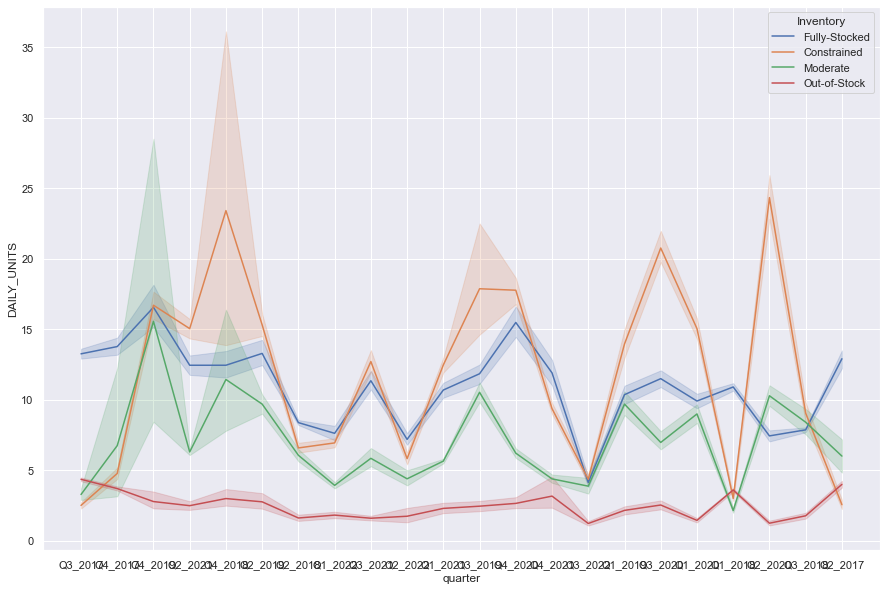

In [257]:
sns.set(rc={'figure.figsize':(15,10)})
g=sns.lineplot(data=df_subset,x="quarter",y="DAILY_UNITS",hue="Inventory")

## Observations : 

**Higher variance is seen in sales of products when they are in constrained or moderate state**
**Slow mo

/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/3200808804.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=list(sorted(df_subset['year-month'].unique())),rotation=90)


[Text(0, 0, '2017-05'),
 Text(1, 0, '2017-06'),
 Text(2, 0, '2017-07'),
 Text(3, 0, '2017-08'),
 Text(4, 0, '2017-09'),
 Text(5, 0, '2017-10'),
 Text(6, 0, '2017-11'),
 Text(7, 0, '2017-12'),
 Text(8, 0, '2018-01'),
 Text(9, 0, '2018-02'),
 Text(10, 0, '2018-03'),
 Text(11, 0, '2018-04'),
 Text(12, 0, '2018-05'),
 Text(13, 0, '2018-06'),
 Text(14, 0, '2018-07'),
 Text(15, 0, '2018-08'),
 Text(16, 0, '2018-09'),
 Text(17, 0, '2018-10'),
 Text(18, 0, '2018-11'),
 Text(19, 0, '2018-12'),
 Text(20, 0, '2019-01'),
 Text(21, 0, '2019-02'),
 Text(22, 0, '2019-03'),
 Text(23, 0, '2019-04'),
 Text(24, 0, '2019-05'),
 Text(25, 0, '2019-06'),
 Text(26, 0, '2019-07'),
 Text(27, 0, '2019-08'),
 Text(28, 0, '2019-09'),
 Text(29, 0, '2019-10'),
 Text(30, 0, '2019-11'),
 Text(31, 0, '2019-12'),
 Text(32, 0, '2020-01'),
 Text(33, 0, '2020-02'),
 Text(34, 0, '2020-03'),
 Text(35, 0, '2020-04'),
 Text(36, 0, '2020-05'),
 Text(37, 0, '2020-06'),
 Text(38, 0, '2020-07'),
 Text(39, 0, '2020-08'),
 Text(40, 

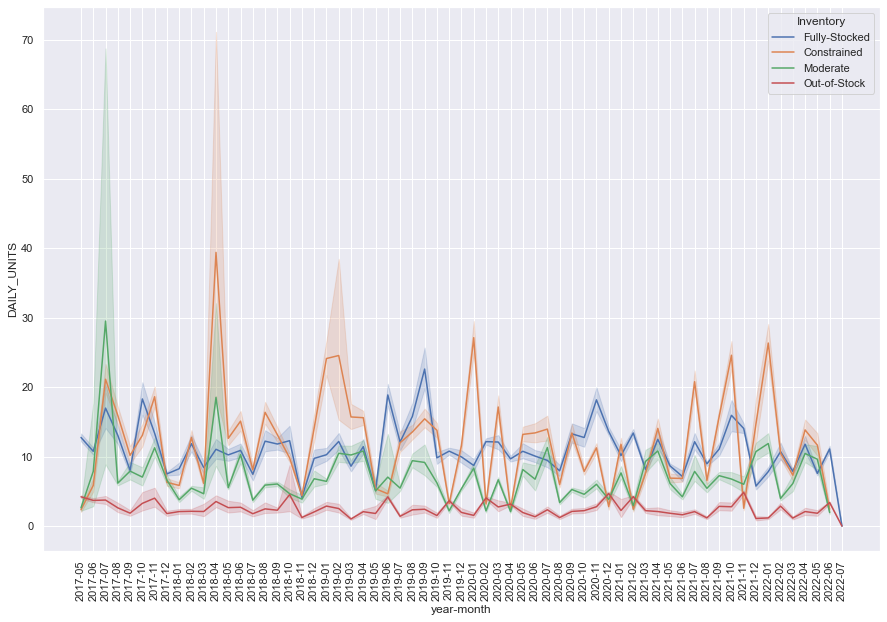

In [270]:
sns.set(rc={'figure.figsize':(15,10)})
g=sns.lineplot(data=df_subset,x="year-month",y="DAILY_UNITS",hue="Inventory")
g.set_xticklabels(labels=list(sorted(df_subset['year-month'].unique())),rotation=90)

In [219]:
df_g3=df_subset.groupby(["Encoded_SKU_ID","Inventory"],as_index=False).agg(n_dates=('SALES_DATE','count'),\
                                                                     avg_units_sold=('DAILY_UNITS','mean'),
                                                                    std_units_sold=('DAILY_UNITS',lambda x:x.std(ddof=0)))


In [272]:
df_g3['overall_sales']=df_g3.groupby('Encoded_SKU_ID')['n_dates'].transform(sum)

In [280]:
df_g3.head()

,Encoded_SKU_ID,Inventory,n_dates,avg_units_sold,std_units_sold,overall_sales
0,1,Fully-Stocked,1828,2.271882,1.896079,1884
1,1,Out-of-Stock,56,2.142857,1.528638,1884
2,2,Fully-Stocked,1877,12.524241,9.061859,1891
3,2,Out-of-Stock,14,19.642857,14.787094,1891
4,3,Constrained,381,4.280840,2.737391,1838


In [292]:
df_g3['%']=round((df_g3['n_dates']/df_g3['overall_sales'])*100,2)

In [294]:
df_g3.drop(columns='full_stock_%',inplace=True)

In [305]:
p1=df_g3[(df_g3['Inventory']=='Fully-Stocked') & (df_g3['%']>99.0)]['Encoded_SKU_ID'].nunique()/df_g3['Encoded_SKU_ID'].nunique()

In [306]:
print(f"{p1*100:.2f} % of SKUs are fully stocked for more than 99% of the days")

22.26 % of SKUs are fully stocked for more than 99% of the days


In [402]:
df_pad=pd.read_csv("train_data_padded.csv")

In [403]:
df_pad.drop(columns="Unnamed: 0",inplace=True)

In [404]:
df_pad["DAILY_UNITS"]=df_pad["DAILY_UNITS"].astype(int)

In [405]:
df_pad["Daily_units_str"]=df_pad["DAILY_UNITS"].apply(lambda x:'y' if x!=0 else 'n')

In [406]:
df_pad.head()

,date,Encoded_SKU_ID,DAILY_UNITS,Daily_units_str
0,2017-05-28,1.0,0,n
1,2017-05-29,1.0,0,n
2,2017-05-30,1.0,0,n
3,2017-05-31,1.0,0,n
4,2017-06-01,1.0,0,n


In [407]:
df_g4=df_pad.groupby(["Encoded_SKU_ID"],as_index=False)["Daily_units_str"].sum()

In [408]:
df_g5=df_pad.groupby(["Encoded_SKU_ID","Daily_units_str"],as_index=False).agg(total_days=("date","count"))

In [409]:
df_g5["total_days_overall"]=df_g5.groupby(["Encoded_SKU_ID"])["total_days"].transform(sum)

In [410]:
df_g5['%']=np.round((df_g5['total_days']/df_g5['total_days_overall'])*100,2)

In [411]:
df_g5[(df_g5["Daily_units_str"]=='n')]['%'].describe()

count    574.000000
mean      20.266916
std       16.963450
min        0.060000
25%        5.627500
50%       15.095000
75%       31.637500
max       73.230000
Name: %, dtype: float64

In [440]:
df_g5["rank"]=df_g5.groupby(["Daily_units_str"])['%'].transform(lambda x:x.rank(method='dense',ascending=False))

In [533]:
set_1=set(df_g5[(df_g5["Daily_units_str"]=="n") & (df_g5["rank"]<=30)].sort_values(by=["rank"])["Encoded_SKU_ID"].unique())

In [466]:
df_g5[(df_g5["Daily_units_str"]=="n") & (df_g5["%"]>=60)]

,Encoded_SKU_ID,Daily_units_str,total_days,total_days_overall,%,rank
308,155.0,n,1269,1733,73.23,1.0
352,177.0,n,1180,1877,62.87,3.0
815,409.0,n,694,1104,62.86,4.0
911,457.0,n,992,1599,62.04,5.0
1031,517.0,n,1092,1583,68.98,2.0


In [467]:
# 5 sku's with unsold on more than 60% of days
# Top 10 sku's based on number of unsold days

In [470]:
df_g5[(df_g5["Daily_units_str"]=="n") & (df_g5["rank"]<=10)]

,Encoded_SKU_ID,Daily_units_str,total_days,total_days_overall,%,rank
190,96.0,n,932,1583,58.88,9.0
308,155.0,n,1269,1733,73.23,1.0
314,158.0,n,1108,1870,59.25,7.0
330,166.0,n,1113,1891,58.86,10.0
352,177.0,n,1180,1877,62.87,3.0
493,248.0,n,1036,1751,59.17,8.0
815,409.0,n,694,1104,62.86,4.0
853,428.0,n,945,1583,59.70,6.0
911,457.0,n,992,1599,62.04,5.0
1031,517.0,n,1092,1583,68.98,2.0


In [490]:
df_g6=df_pad.groupby(["Encoded_SKU_ID"],as_index=False)["Daily_units_str"].sum()

In [510]:
df_g6.head()

,Encoded_SKU_ID,Daily_units_str
0,1.0,nnnnnyyyyyyyyyyyyyynynyyyyyyyyyynyyyyyyyyyyyyy...
1,2.0,nnnnnyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...
2,3.0,nnnyyyynynnnnynynynnyynnyyynnyyyynnnynnnyynyny...
3,4.0,yyyyyyyyyyyyyyyyyyyyyyyyynyyyyyyyyyyyyynyyyyyy...
4,5.0,nnnnnyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...


In [514]:
df_g6.loc[:,"avg_shelf_life"]=df_g6["Daily_units_str"].apply(lambda x:np.mean([len(i) for i in x.split('y') if i!='']))  

In [517]:
df_g6["rank"]=df_g6["avg_shelf_life"].rank(method='dense',ascending=False)

In [532]:
set_2=set(df_g6[df_g6["rank"].between(1,20)].sort_values(by=["rank"])["Encoded_SKU_ID"].unique())

In [534]:
list(set_1.intersection(set_2))

[449.0, 358.0, 409.0, 155.0, 223.0]

In [538]:
list(df_g6[df_g6["rank"].between(1,20)].sort_values(by=["rank"])["Encoded_SKU_ID"].unique())

[424.0,
 207.0,
 101.0,
 387.0,
 252.0,
 449.0,
 201.0,
 494.0,
 37.0,
 304.0,
 452.0,
 4.0,
 69.0,
 378.0,
 358.0,
 526.0,
 223.0,
 157.0,
 446.0,
 409.0]

In [537]:
df_g6[df_g6["rank"].between(1,20)]

,Encoded_SKU_ID,Daily_units_str,avg_shelf_life,rank
3,4.0,yyyyyyyyyyyyyyyyyyyyyyyyynyyyyyyyyyyyyynyyyyyy...,9.387755,12.0
36,37.0,nnnnnyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,11.300000,9.0
68,69.0,nyyyyyyyyyyyyyyyyyyyyynyyyynnyyyyyyyyynnyyyyny...,8.988372,13.0
100,101.0,yyyyyyyyynyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,57.857143,3.0
156,157.0,ynynnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn...,5.703297,18.0
200,201.0,yyynyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,11.666667,7.0
206,207.0,yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,81.800000,2.0
222,223.0,yyyyyyyyyyyynyyyyyyyyyyyyyyyyyyyyyyynynyyyyyyy...,5.784314,17.0
251,252.0,yyyyyynnnnnnnnnnnnnnnnnyyyyyyyyyyyyyyyyyyyyyyy...,17.000000,5.0
303,304.0,nnnnnnynnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn...,9.845070,10.0


In [539]:
df_g6

,Encoded_SKU_ID,Daily_units_str,avg_shelf_life,rank
0,1.0,nnnnnyyyyyyyyyyyyyynynyyyyyyyyyynyyyyyyyyyyyyy...,1.416327,373.0
1,2.0,nnnnnyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,1.147059,497.0
2,3.0,nnnyyyynynnnnynynynnyynnyyynnyyyynnnynnnyynyny...,1.845833,224.0
3,4.0,yyyyyyyyyyyyyyyyyyyyyyyyynyyyyyyyyyyyyynyyyyyy...,9.387755,12.0
4,5.0,nnnnnyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,1.113924,510.0
...,...,...,...,...
570,571.0,ynnynnnynynnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn...,3.224490,63.0
571,572.0,nnnyynyyyyynyyyynnnyynyyyyyynyyyyyyyynyyynynyy...,1.147059,497.0
572,573.0,nnnnnynynyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,1.656250,286.0
573,574.0,nnnyyyynnyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,2.071429,188.0


In [547]:
df_g6["5tile"]=pd.qcut(df_g6["avg_shelf_life"],5,labels=[1,2,3,4,5])

In [572]:
slow_skus=list(df_g6[df_g6["rank"].between(1,20)]["Encoded_SKU_ID"])

In [577]:
df_g6["Outlier_status"]=df_g6["Encoded_SKU_ID"].apply(lambda x:"outlier" if x in slow_skus else "not outlier")

In [578]:
df_g6

,Encoded_SKU_ID,Daily_units_str,avg_shelf_life,rank,5tile,Outlier_status
0,1.0,nnnnnyyyyyyyyyyyyyynynyyyyyyyyyynyyyyyyyyyyyyy...,1.416327,373.0,2,not outlier
1,2.0,nnnnnyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,1.147059,497.0,1,not outlier
2,3.0,nnnyyyynynnnnynynynnyynnyyynnyyyynnnynnnyynyny...,1.845833,224.0,3,not outlier
3,4.0,yyyyyyyyyyyyyyyyyyyyyyyyynyyyyyyyyyyyyynyyyyyy...,9.387755,12.0,5,outlier
4,5.0,nnnnnyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,1.113924,510.0,1,not outlier
...,...,...,...,...,...,...
570,571.0,ynnynnnynynnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn...,3.224490,63.0,5,not outlier
571,572.0,nnnyynyyyyynyyyynnnyynyyyyyynyyyyyyyynyyynynyy...,1.147059,497.0,1,not outlier
572,573.0,nnnnnynynyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,1.656250,286.0,3,not outlier
573,574.0,nnnyyyynnyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy...,2.071429,188.0,4,not outlier


In [556]:
pd.qcut(df_g6["avg_shelf_life"],5).unique()

[(1.288, 1.524], (0.999, 1.288], (1.524, 1.867], (2.576, 399.0], (1.867, 2.576], NaN]
Categories (5, interval[float64, right]): [(0.999, 1.288] < (1.288, 1.524] < (1.524, 1.867] < (1.867, 2.576] < (2.576, 399.0]]

In [551]:
df_g6["5tile"].value_counts()

2    116
1    115
4    115
5    115
3    113
Name: 5tile, dtype: int64

In [564]:
df_s2

,Encoded_SKU_ID,SALES_DATE,Inventory,DAILY_UNITS,sales_yr,sales_quarter,quarter,year-month,year-quarter,avg_shelf_life,5tile
0,1,2017-09-28,Fully-Stocked,1,2017,3,Q3_2017,2017-09,2017-q,1.416327,2
1,1,2018-10-27,Fully-Stocked,7,2018,4,Q4_2018,2018-10,2018-q,1.416327,2
2,1,2017-08-27,Fully-Stocked,2,2017,3,Q3_2017,2017-08,2017-q,1.416327,2
3,1,2021-03-08,Fully-Stocked,0,2021,1,Q1_2021,2021-03,2021-q,1.416327,2
4,1,2019-11-04,Fully-Stocked,5,2019,4,Q4_2019,2019-11,2019-q,1.416327,2
...,...,...,...,...,...,...,...,...,...,...,...
846627,557,2021-10-02,Fully-Stocked,234,2021,4,Q4_2021,2021-10,2021-q,1.000000,1
846628,557,2020-11-02,Fully-Stocked,73,2020,4,Q4_2020,2020-11,2020-q,1.000000,1
846629,557,2020-09-25,Fully-Stocked,67,2020,3,Q3_2020,2020-09,2020-q,1.000000,1
846630,557,2022-05-13,Fully-Stocked,215,2022,2,Q2_2022,2022-05,2022-q,1.000000,1


In [579]:
df_s2=df_subset.merge(df_g6[["Encoded_SKU_ID","avg_shelf_life","5tile","Outlier_status"]],on="Encoded_SKU_ID",how="inner")

In [566]:
df_g8=df_s2.groupby(["5tile","sales_yr"],as_index=False)["DAILY_UNITS"].mean()

/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/1484062909.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.set_xticklabels(labels=list(sorted(df_subset['sales_yr'].unique())),rotation=45)


[Text(2016.0, 0, '2017'),
 Text(2017.0, 0, '2018'),
 Text(2018.0, 0, '2019'),
 Text(2019.0, 0, '2020'),
 Text(2020.0, 0, '2021'),
 Text(2021.0, 0, '2022'),
 Text(2022.0, 0, ''),
 Text(2023.0, 0, '')]

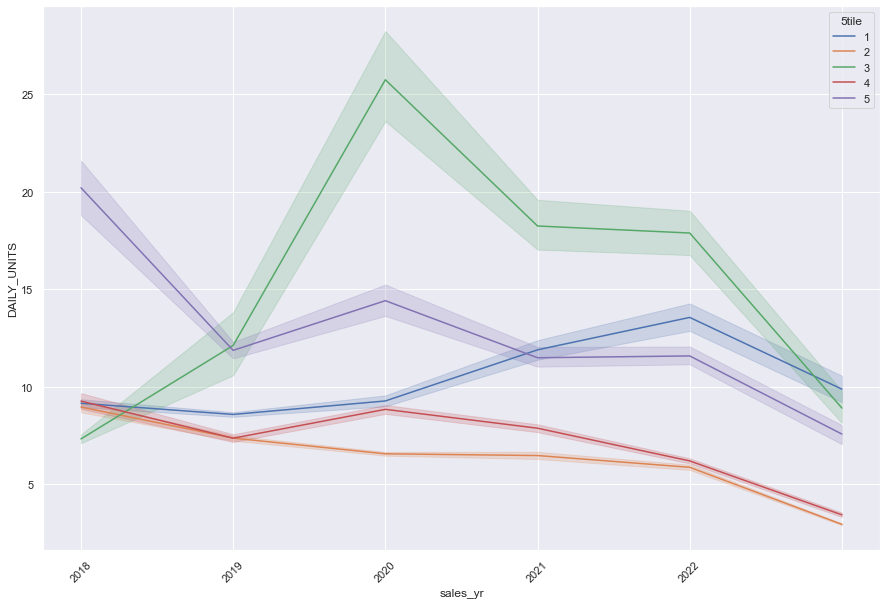

In [568]:
sns.set(rc={'figure.figsize':(15,10)})
g1=sns.lineplot(data=df_s2,x="sales_yr",y="DAILY_UNITS",hue="5tile")
g1.set_xticklabels(labels=list(sorted(df_subset['sales_yr'].unique())),rotation=45)

/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/93247624.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.set_xticklabels(labels=list(sorted(df_subset['sales_yr'].unique())),rotation=45)


[Text(2016.0, 0, '2017'),
 Text(2017.0, 0, '2018'),
 Text(2018.0, 0, '2019'),
 Text(2019.0, 0, '2020'),
 Text(2020.0, 0, '2021'),
 Text(2021.0, 0, '2022'),
 Text(2022.0, 0, ''),
 Text(2023.0, 0, '')]

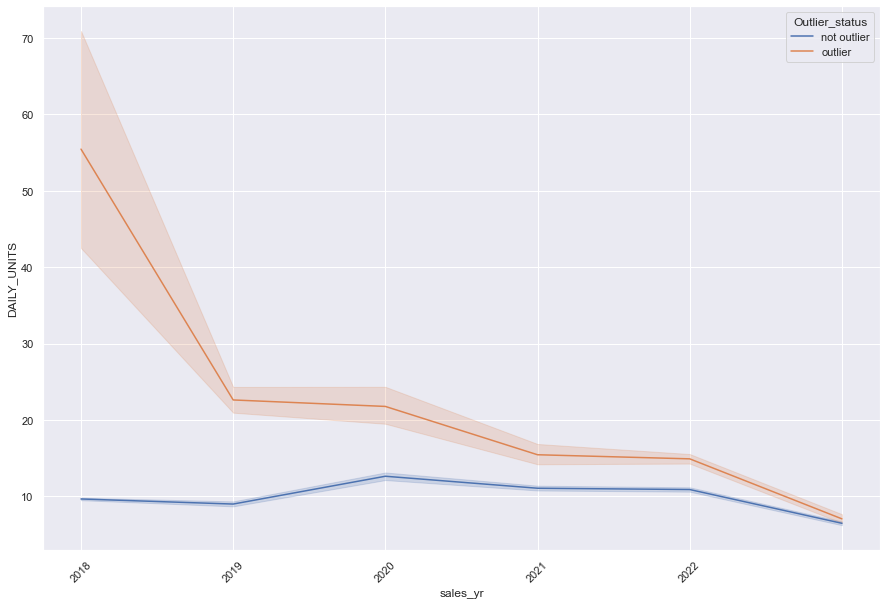

In [583]:
sns.set(rc={'figure.figsize':(15,10)})
g1=sns.lineplot(data=df_s2,x="sales_yr",y="DAILY_UNITS",hue="Outlier_status")
g1.set_xticklabels(labels=list(sorted(df_subset['sales_yr'].unique())),rotation=45)

/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/886558091.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.set_xticklabels(labels=list(sorted(df_subset['year-month'].unique())),rotation=45)


[Text(0, 0, '2017-05'),
 Text(1, 0, '2017-06'),
 Text(2, 0, '2017-07'),
 Text(3, 0, '2017-08'),
 Text(4, 0, '2017-09'),
 Text(5, 0, '2017-10'),
 Text(6, 0, '2017-11'),
 Text(7, 0, '2017-12'),
 Text(8, 0, '2018-01'),
 Text(9, 0, '2018-02'),
 Text(10, 0, '2018-03'),
 Text(11, 0, '2018-04'),
 Text(12, 0, '2018-05'),
 Text(13, 0, '2018-06'),
 Text(14, 0, '2018-07'),
 Text(15, 0, '2018-08'),
 Text(16, 0, '2018-09'),
 Text(17, 0, '2018-10'),
 Text(18, 0, '2018-11'),
 Text(19, 0, '2018-12'),
 Text(20, 0, '2019-01'),
 Text(21, 0, '2019-02'),
 Text(22, 0, '2019-03'),
 Text(23, 0, '2019-04'),
 Text(24, 0, '2019-05'),
 Text(25, 0, '2019-06'),
 Text(26, 0, '2019-07'),
 Text(27, 0, '2019-08'),
 Text(28, 0, '2019-09'),
 Text(29, 0, '2019-10'),
 Text(30, 0, '2019-11'),
 Text(31, 0, '2019-12'),
 Text(32, 0, '2020-01'),
 Text(33, 0, '2020-02'),
 Text(34, 0, '2020-03'),
 Text(35, 0, '2020-04'),
 Text(36, 0, '2020-05'),
 Text(37, 0, '2020-06'),
 Text(38, 0, '2020-07'),
 Text(39, 0, '2020-08'),
 Text(40, 

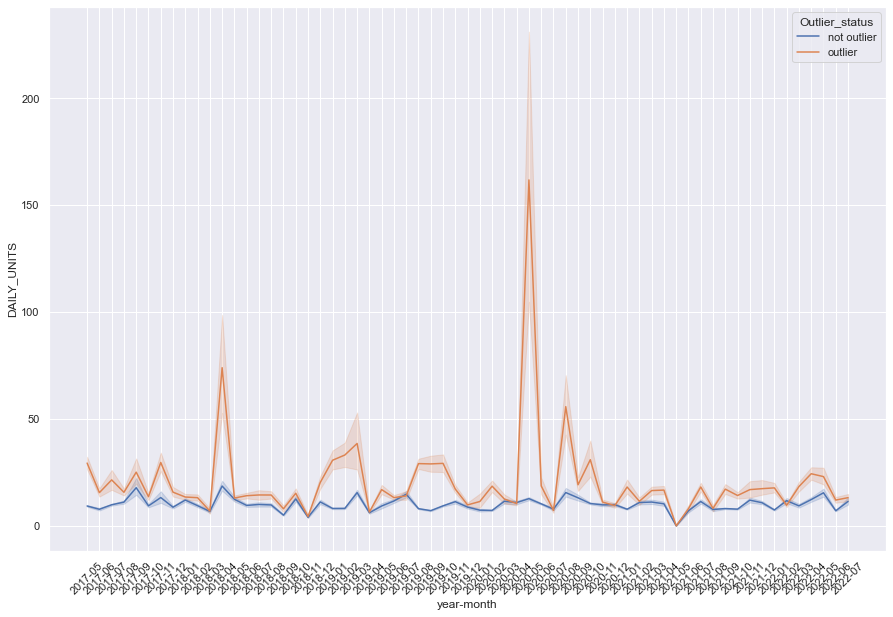

In [584]:
sns.set(rc={'figure.figsize':(15,10)})
g1=sns.lineplot(data=df_s2,x="year-month",y="DAILY_UNITS",hue="Outlier_status")
g1.set_xticklabels(labels=list(sorted(df_subset['year-month'].unique())),rotation=45)

In [580]:
df_g9=df_s2.groupby(["Outlier_status","sales_yr"],as_index=False)["DAILY_UNITS"].mean()

/var/folders/79/wlb93l7n51xbb60lcrj4jbr00000gn/T/ipykernel_67142/1456195228.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.set_xticklabels(labels=list(sorted(df_subset['year-month'].unique())),rotation=90)


[Text(0, 0, '2017-05'),
 Text(1, 0, '2017-06'),
 Text(2, 0, '2017-07'),
 Text(3, 0, '2017-08'),
 Text(4, 0, '2017-09'),
 Text(5, 0, '2017-10'),
 Text(6, 0, '2017-11'),
 Text(7, 0, '2017-12'),
 Text(8, 0, '2018-01'),
 Text(9, 0, '2018-02'),
 Text(10, 0, '2018-03'),
 Text(11, 0, '2018-04'),
 Text(12, 0, '2018-05'),
 Text(13, 0, '2018-06'),
 Text(14, 0, '2018-07'),
 Text(15, 0, '2018-08'),
 Text(16, 0, '2018-09'),
 Text(17, 0, '2018-10'),
 Text(18, 0, '2018-11'),
 Text(19, 0, '2018-12'),
 Text(20, 0, '2019-01'),
 Text(21, 0, '2019-02'),
 Text(22, 0, '2019-03'),
 Text(23, 0, '2019-04'),
 Text(24, 0, '2019-05'),
 Text(25, 0, '2019-06'),
 Text(26, 0, '2019-07'),
 Text(27, 0, '2019-08'),
 Text(28, 0, '2019-09'),
 Text(29, 0, '2019-10'),
 Text(30, 0, '2019-11'),
 Text(31, 0, '2019-12'),
 Text(32, 0, '2020-01'),
 Text(33, 0, '2020-02'),
 Text(34, 0, '2020-03'),
 Text(35, 0, '2020-04'),
 Text(36, 0, '2020-05'),
 Text(37, 0, '2020-06'),
 Text(38, 0, '2020-07'),
 Text(39, 0, '2020-08'),
 Text(40, 

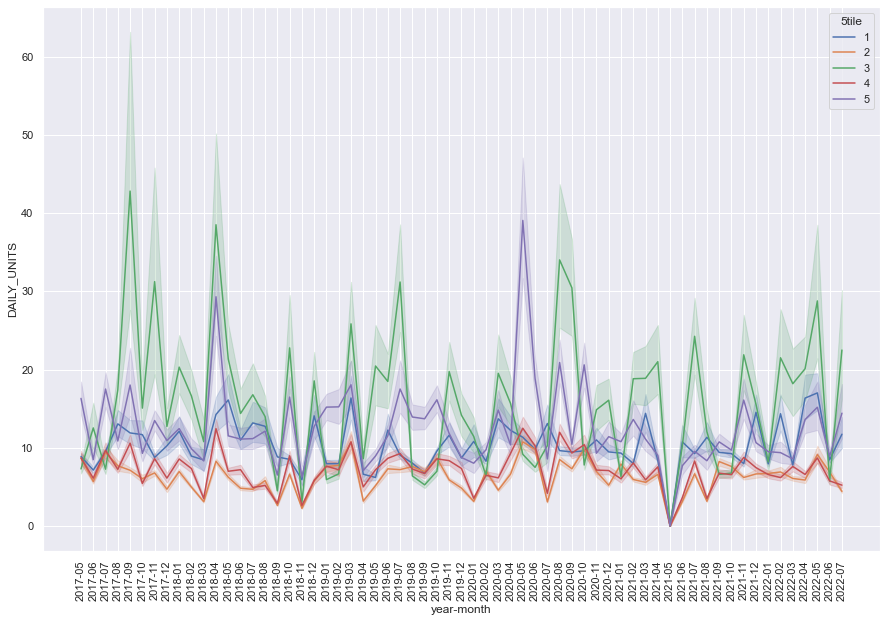

In [582]:
sns.set(rc={'figure.figsize':(15,10)})
g1=sns.lineplot(data=df_s2,x="year-month",y="DAILY_UNITS",hue="5tile")
g1.set_xticklabels(labels=list(sorted(df_subset['year-month'].unique())),rotation=90)